# Model

In [1]:
# @title
import datetime
print(datetime.datetime.now())

2024-02-15 14:11:45.824096


* A **toy model** is a deliberately simplistic model with many details removed while preserving important and necessary characteristics so that it can be used to explain something concisely.
  * The 'best' model of a subject is exactly the subject itself.
  * However, most of the time, a subject is too complex that we are not able to (or we do not know how to) describe it.

* A **machine learning model** can be a mathematical representation of a real-world relationship of data.

* <font color="red">Question: why do we need a model?</font>


## Data Table

In [3]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


* Table is a straightforward way to present data, and it usually includes
  * $n$ data points
  * each data point is represented by $m$ features, $x_1$ to $x_m$
  * the entire features can be represented as a vector $X$
  * it may have a specical column -- a target $y$
* A model $M$ is trying to represent the entire data (including $X$ and $y$).
  * As mentioned, the best way to represent the data is to keep the entire table.
  * However, the number of data points and/or the number of features might be large. It is not efficient to do so.
  * Now, we are trying to find a more concise way to represent the data. And more, if there is indeed a concise (mathematical) way to represent the $n$ data points, that means, the data points have some hidden relations (between instances and/or between $X$ and $y$), so that a concise representation is possbile.

* We consider a data table, such that
  * has a **traget** $y$
  * all **features** $X$
* A **model** $M: X \rightarrow y$ can be found by using the existing $n$ data points, a.k.a. **training data**.
  * Generally, $X$ and $y$ could be numeric or categorical values.
    * Different types of data and target have different algorithms to create a model.
    * If target $y$ is numeric, the model is called **regression model**.
    * If target $y$ is categorical, the model is called **classification model**.
  * Theoratically, there should be *lots of models* can be used to correctly represent the $n$ data points. However, most of the time, we want a concise one and can accept some small errors (it is a trade-off).
    * That means, maybe not all $n$ data points are represented.
    * Maybe $y$ value has an error.
  * As mentioned, there midght be a ground-truth function that can generate the training data (from a hidden distribution), $y = f(X)$. These $n$ data points can be viewed as some samples (observations) from the distribution.
  * A model can be viewed as an approximate function to represent the data in this way: $\hat{y} = g(X)$.
    * $\hat{y}$ is the **prediction** value of the model $g()$ while observing $X$.
    * $g()$ is an approximation of $f()$.

* If a model,
  * has $X$ and $y$, we can learn the relation between $X$ and $y$ by different algorithms. These algorithms belong to **supervised learning algorithm**.
  * has only $X$, we can learn the relation between these $n$ data points in $X$. Such algorithms belong to **unsupervised learning algorithm**.

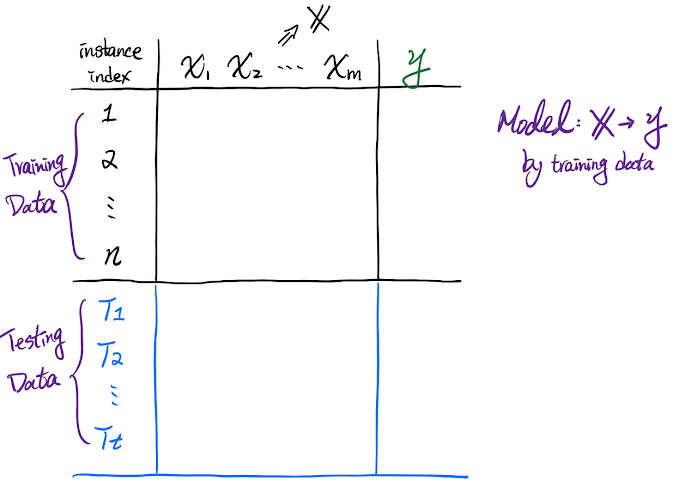

## Linear Regression

Linear regression is a **supervised** learning algorithm, i.e., it can find the relation between $X$ and $y$. Moreover, it is a regression algorithm so that its $y$ is **numeric**. (Note that usually $X$ is numeric as well.)

### Make toy dataset

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Create simple data
n = 20
np.random.seed(0)
x = np.random.rand(n)*4
y = 1.05 * x + np.random.randn(n)/5 - 0.5

pd.DataFrame({'x': x, 'y': y})

,x,y
0,2.195254,2.103833
1,2.860757,2.462764
2,2.411054,2.094220
3,2.179533,1.617690
4,1.694619,0.768752
5,2.583576,2.343479
6,1.750349,1.510754
7,3.567092,3.097014
8,3.854651,4.001335
9,1.533766,0.819581


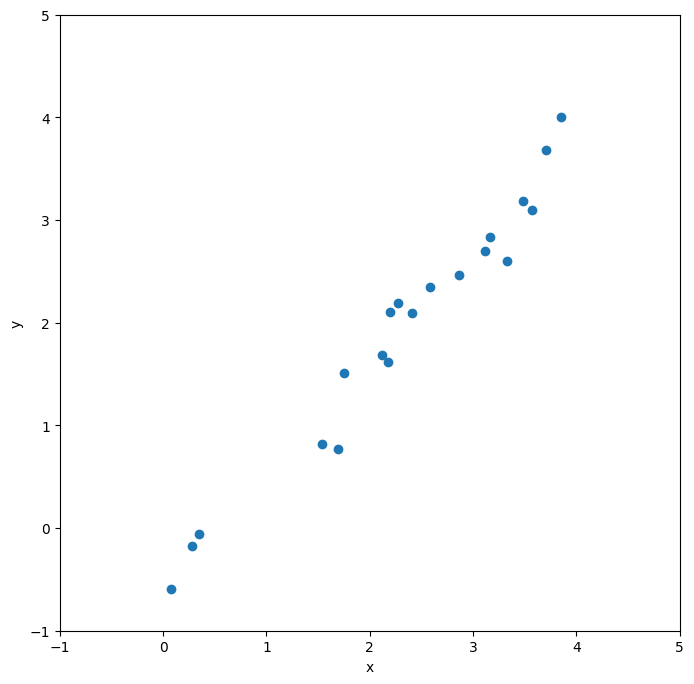

In [12]:
# plot
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.show()

### Question about Linear Regression?

* Does the above data look like 'linear'?
* If we do not want to remember the entire data set (although it has only 20 data points), can we use a line to represent the data (i.e., find the relationship between $x$ and $y$)?
* Would a line be appropriate?
* How do we find the 'best' line (i.e., model) to represent the data? Which one (red line or blue line) can best represent the relationship between $x$ and $y$?

### Model and Errors

In [10]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

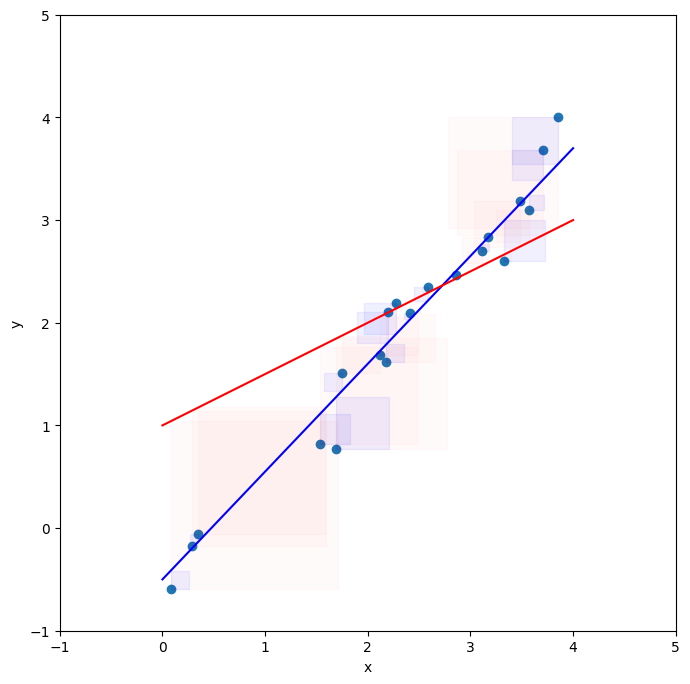

In [11]:
# Errors
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(x, y)
plt.plot([0, 4], [-0.5, 3.7], color="blue") # [x0, x1], [y0, y1] y = 1.05*x-0.5
plt.plot([0, 4], [1, 3], color="red") # [x0, x1], [y0, y1] y = 0.5*x+1
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal', adjustable='box')

# blue
errorboxes = [Rectangle((i - (j-(a*i+b)), j - (j-(a*i+b))), j-(a*i+b), j-(a*i+b)) if j > (a*i+b) else Rectangle((i,j), a*i+b-j, a*i+b-j ) for i, j, a, b in zip(x, y, [1.05]*n, [-0.5]*n)]
pc = PatchCollection(errorboxes, facecolor='blue', alpha=0.06, edgecolor='blue')
ax.add_collection(pc)

# red
reb = [Rectangle((i - (j-(a*i+b)), j - (j-(a*i+b))), j-(a*i+b), j-(a*i+b)) if j > (a*i+b) else Rectangle((i,j), a*i+b-j, a*i+b-j ) for i, j, a, b in zip(x, y, [0.5]*n, [1.0]*n)]
rpc = PatchCollection(reb, facecolor='red', alpha=0.02, edgecolor='red')
ax.add_collection(rpc)

plt.show()

### MSE (mean square error) and other errors
* MSE = $\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^{2}}$

  * $\hat{y_i}$ = $g(x_i)$
  * Linear regression model with one feature: $g(x_1)$ = $ax_1+b$
  * General Form: $g(X)$ = $\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + ...$, and $\theta$ is the set of all factors
  * Or $g(X) = W^T \cdot X$, and $W$ stands for weight vector; $T$ is transpose.

* RMSE = $\sqrt{\text{MSE}}$

* MAE = $\frac{1}{n}\sum_{i=1}^{n}{|y_i - \hat{y_i}|}$

* Which evaluation is better?

### Linear Regression by sklearn

In [14]:
from sklearn.linear_model import LinearRegression

#initantiate the linear regression
linearRegModel = LinearRegression()

# X should look like [[2.195254], [2.860757], ...]
# since X may have more than one features
X = x.reshape(-1, 1)

#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X, y)

print("Intercept is ", linearRegModel.intercept_)

# If multiple features in X, then we get a list of coefficient.
print("coefficient is ", linearRegModel.coef_)

Intercept is  -0.607541842192133
coefficients  is  [1.09674556]


In [21]:
# prediction

predicted_y = linearRegModel.predict(X)
df = pd.DataFrame({'x': x, 'y': y,
                   'y_hat': predicted_y,
                   'y_blu': 1.05 * x -0.5,
                   'y_red': 0.5 * x + 1.0 })

In [22]:
print("MSE_y_hat", sum(np.power(df['y']-df['y_hat'], 2))/n)
print("MSE_y_blu", sum(np.power(df['y']-df['y_blu'], 2))/n)
print("MSE_y_red", sum(np.power(df['y']-df['y_red'], 2))/n)

MSE_y_hat 0.05370017117303051
MSE_y_blu 0.05636326479205489
MSE_y_red 0.5355882998620926


In [23]:
print("MAE_y_hat", sum(np.abs(df['y']-df['y_hat']))/n)
print("MAE_y_blu", sum(np.abs(df['y']-df['y_blu']))/n)
print("MAE_y_red", sum(np.abs(df['y']-df['y_red']))/n)

MAE_y_hat 0.18869548427776175
MAE_y_blu 0.1854476433817208
MAE_y_red 0.5396609777352447


### MAE or MSE (Colab AI)

**MSE (Mean Squared Error)**

* Advantages:
  * MSE penalizes large errors more heavily than MAE. This can be important if you are concerned about outliers in your data.
  * MSE is a differentiable function, which makes it easier to use with gradient-based optimization algorithms.
* Disadvantages:
  * MSE is more sensitive to outliers than MAE. This can be a problem if you have a lot of outliers in your data.
  * MSE can be misleading if your data is skewed. This is because MSE gives more weight to larger errors, which can skew the results.

**MAE (Mean Absolute Error)**

* Advantages:
  * MAE is less sensitive to outliers than MSE. This can be important if you have a lot of outliers in your data.
  * MAE is not affected by skewness in the data.
* Disadvantages:
  * MAE does not penalize large errors as heavily as MSE. This can be a problem if you are concerned about outliers in your data.
  * MAE is not a differentiable function, which makes it more difficult to use with gradient-based optimization algorithms.

Here are some additional factors to consider when choosing an error metric:

* **Interpretability**: MAE is often easier to interpret than MSE, as it represents the average absolute difference between the predicted and actual values.
* **Robustness**: MAE is more robust to outliers than MSE.
* **Computational efficiency**: MSE is computationally more efficient than MAE.

### Find $\theta^*$


* Find the minimum value of MSE by differentiation!
  * MSE = $\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^{2}}$
  * Let $\hat{y_i} = \theta_0 + \theta_1 x_i $ (or $\hat{y} = ax+b$, i.e., linear model)
  * MSE = $\frac{1}{n}\sum_{i=1}^{n}{(y_i - (\theta_0 + \theta_1 x_i))^{2}}$
  * MSE = $\frac{1}{n}\sum_{i=1}^{n}{x_{i}^{2}\theta_{1}^{2} + \theta_{0}^{2} + 2 x_i \theta_1 \theta_0 - 2 x_{i} y_{i} \theta_1 - 2 y_i \theta_0  + y_{i}^{2} }$
  * MSE becomes a two variables ($\theta_0$, $\theta_1$) polynomial function of degree 2.
    * From the training data, we know all $x_i$ and $y_i$.
    * MSE is a 3D surface with a minmal value.

In [25]:
f1 = sum(pow(df['x'], 2))/n
f2 = n/n
f3 = 2.0 * sum(df['x'])/n
f4 = -2.0 * sum(df['x'] * df['y']) / n
f5 = -2.0 * sum(df['y'])/n
f6 = sum(pow(df['y'], 2))/n
print(f1, f2, f3, f4, f5, f6)

6.629363560140185 1.0 4.652438596180779 -11.714899026158847 -3.8874577035887454 5.296935328404828


MSE = $ 6.63 \theta_{1}^{2} + \theta_{0}^{2} + 4.65 \theta_1 \theta_0 - 11.71 \theta_1 - 3.89\theta_0  +5.30 $

How to find $\theta^*$ so that MSE has minimal value? Hint: MSE is a **convex function**.

### Gradient Descent

In [26]:
# Draw the 3D surface (a, b, mse)

a_range = np.linspace(-2, 4, 11) # change the grid granularity from 11 to 22
b_range = np.linspace(-2, 4, 11) # change the grid granularity from 11 to 22
A, B = np.meshgrid(a_range, b_range)

min_z = 1000
Z = []
for a in a_range:
  z_value = []
  for b in b_range:
    this_mse = np.sum(np.power(y - (a*x+b), 2))/len(y)
    z_value.append(this_mse)
    if this_mse < min_z:
      min_z = this_mse
      best_a, best_b = a, b
  Z.append(z_value)

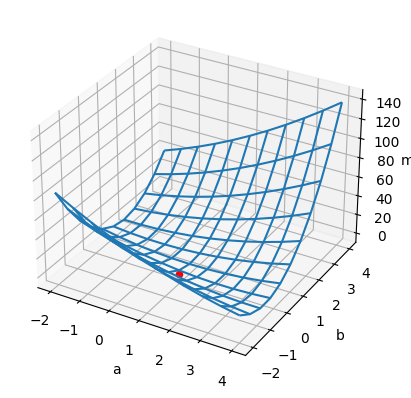

In [27]:
from mpl_toolkits.mplot3d import axes3d

fig_3d = plt.figure()
ax = fig_3d.add_subplot(111, projection='3d')
ax.plot_wireframe(A, B, np.array(Z))
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('mse')

# best mse on grid
ax.scatter3D(best_a, best_b, min_z, color='red')

plt.show()

In [29]:
# answer from above grid
print("The best a, b, and mse on grid are:")
print(best_a, best_b, min_z)

# answer from math
print("\nThe actual a*, b*, and mse* are:")
opt_a = linearRegModel.coef_[0]
opt_b = linearRegModel.intercept_
opt_mse = np.sum(np.power(y - (opt_a * x + opt_b), 2)/len(y))

print(opt_a, opt_b, opt_mse)

The best a, b, and mse on grid are:
1.0 -0.20000000000000018 0.0984036838677576

The actual a*, b*, and mse* are:
1.096745563103557 -0.607541842192133 0.0537001711730305


You shuold not bruce-forcefully try all ($a$, $b$), i.e., ($\theta_1, \theta_0$), to find the optimal MSE.

The partial differential is much quicker to find the minimum value of each dimension.

Using a random pair ($a$, $b$) <u>at time 0</u> as the initial trial point, and of course, the corresponding $z$ is unlikely the optimal MSE.

However, you can do partial differential on the a-axis and b-axis, respectively.

So that we can know that starting from the current ($a$,$b$) <u>at time $t$</u>, which direction on the a-axis and b-axis will lead to a smaller $z$. And <u>at time $t$+1</u>, we can choose a better ($a$, $b$) by considering the direction and make one step ($\gamma$, a.k.a. learning rate) toward the optimized $z$. And so on so forth (many times) to find the optimized $z$ with ($a^*$, $b^*$).

MSE = $\frac{1}{n}\sum_{i=1}^{n}{x_{i}^{2}\theta_{1}^{2} + \theta_{0}^{2} + 2 x_i \theta_1 \theta_0 - 2 x_{i} y_{i} \theta_1 - 2 y_i \theta_0  + y_{i}^{2} }$

$\theta_{i}^{(t+1)} = \theta_{i}^{(t)} - \gamma \frac{\partial \text{MSE}(\theta_{0},\theta_{1})}{\partial \theta_i}$

### Question about Gradient Descent

* Sometimes, MSE is defined as follows. Why?
  * MSE' = $\frac{1}{2n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^{2}}$
* Could GD find the minimum $z$?
* Waht is $\gamma$ (i.e., learning rate)?
* Is there any other faster way to find the minimum $z$?

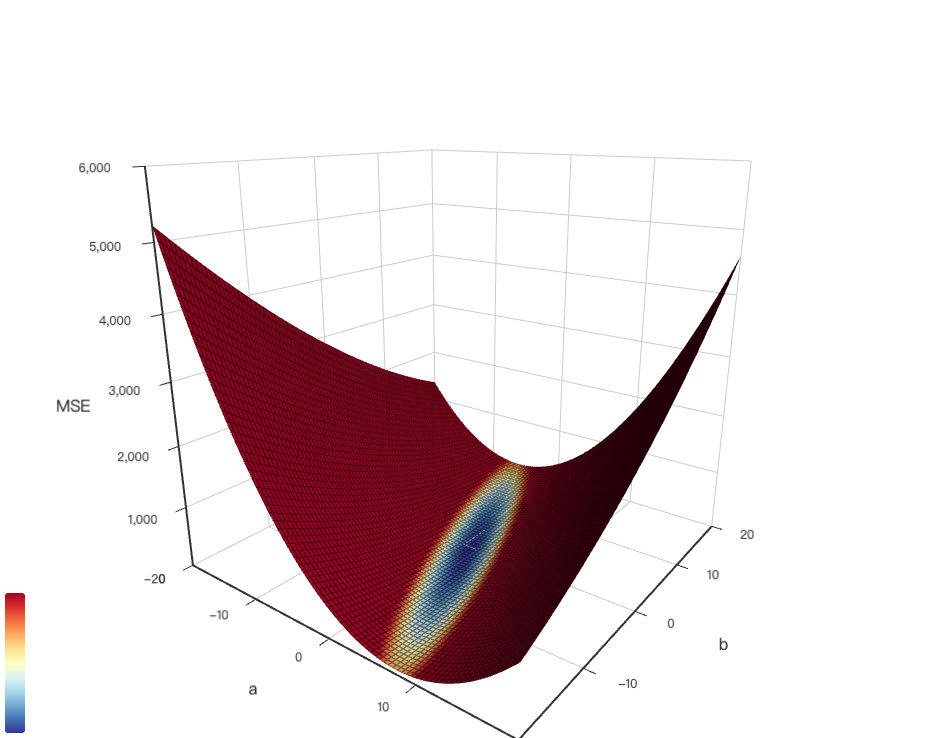

Additional Materials

* [Linear Regression using Python](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2)

## Non-linear Data using Linear Regression

In [30]:
import pandas as pd

# anscombe.json can be found in the same directory in GDrive.
# You can "Mount Drive" to access the file in your GDrive.

try:
  anscombe_df = pd.read_json('/content/sample_data/anscombe.json')
  print("anscombe.json is loaded.")
except:
  print("Check file?")

anscombe.json is loaded.


In [31]:
print(anscombe_df[anscombe_df.Series=="I"])

   Series   X      Y
0       I  10   8.04
1       I   8   6.95
2       I  13   7.58
3       I   9   8.81
4       I  11   8.33
5       I  14   9.96
6       I   6   7.24
7       I   4   4.26
8       I  12  10.84
9       I   7   4.81
10      I   5   5.68


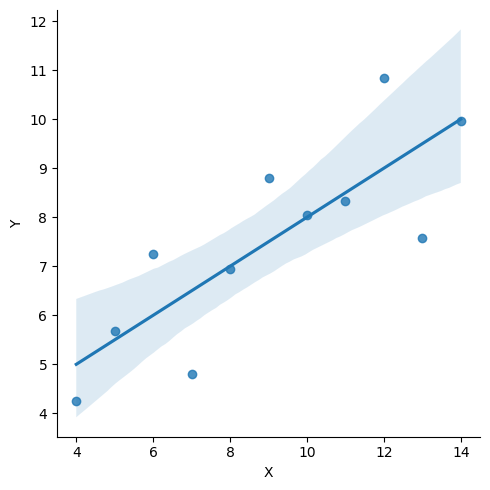

In [32]:
import seaborn

seaborn.lmplot(x='X', y='Y', data=anscombe_df[anscombe_df.Series == 'I'])
#print("It looks like a liner model which is good enough.")

In [33]:
print(anscombe_df[anscombe_df.Series=="II"])

   Series   X     Y
11     II  10  9.14
12     II   8  8.14
13     II  13  8.74
14     II   9  8.77
15     II  11  9.26
16     II  14  8.10
17     II   6  6.13
18     II   4  3.10
19     II  12  9.13
20     II   7  7.26
21     II   5  4.74


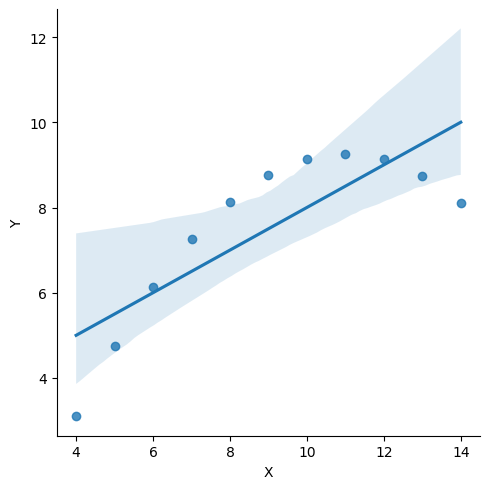

In [34]:
seaborn.lmplot(x='X', y='Y', data=anscombe_df[anscombe_df.Series == 'II'])
#print("model looks not that good, we need polynomial regression.")

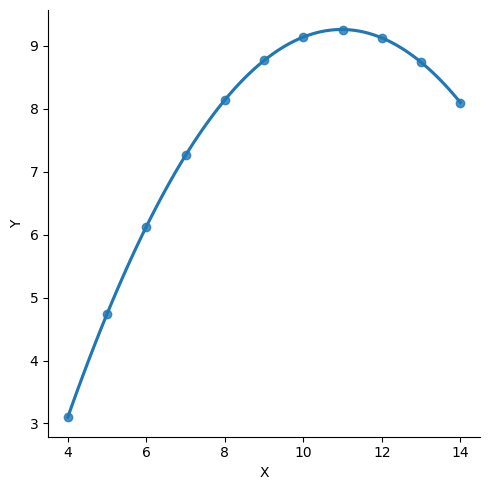

In [35]:
seaborn.lmplot(x="X", y="Y", data=anscombe_df[anscombe_df.Series == 'II'], order=2)
#print("much better")

In [36]:
print(anscombe_df[anscombe_df.Series=="III"])

   Series   X      Y
22    III  10   7.46
23    III   8   6.77
24    III  13  12.74
25    III   9   7.11
26    III  11   7.81
27    III  14   8.84
28    III   6   6.08
29    III   4   5.39
30    III  12   8.15
31    III   7   6.42
32    III   5   5.73


Outliers! It is a big problem!


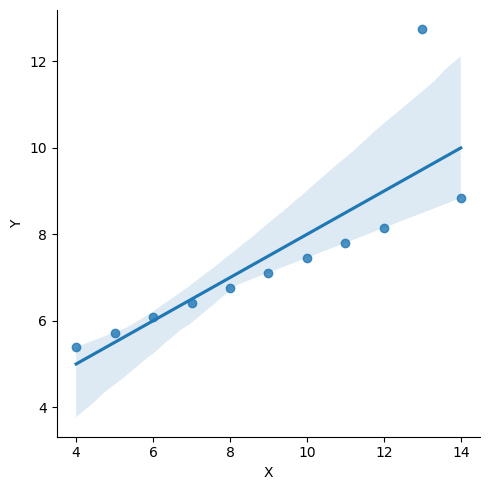

In [37]:
seaborn.lmplot(x='X', y='Y', data=anscombe_df[anscombe_df.Series == 'III'])
print("Outliers! It is a big problem!" )

However, you should not use some magic functions that you do not know much about them.


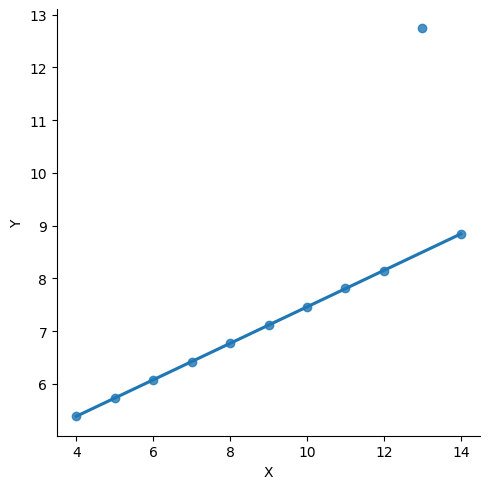

In [38]:
# In the presence of outliers, it can be useful to fit a robust regression,
# which uses a different loss function to downweight relatively large residuals.

seaborn.lmplot(x="X", y="Y", data=anscombe_df[anscombe_df.Series == 'III'], robust=True, ci = None)
print("However, you should not use some magic functions that you do not know much about them.")

# https://seaborn.pydata.org/generated/seaborn.lmplot.html

Error! It is another big problem!


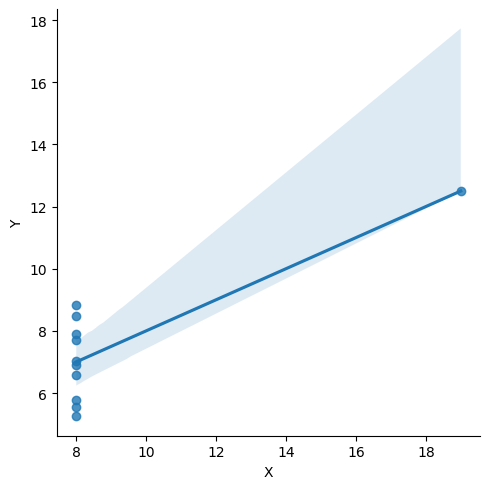

In [39]:
seaborn.lmplot(x='X', y='Y', data=anscombe_df[anscombe_df.Series == 'IV'])
print("Error! It is another big problem!" )

## Dataset: California Housing

It is a regression problem. All features and target are numeric.

### EDA, Exporatory Data Analysis

In [40]:
housing_train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
housing_test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [41]:
housing_train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [42]:
housing_test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [43]:
# Let "median_house_value" be our target.
# See if we can find a linear model to predict the target value.

# take a look at the data
housing_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


could you make a comment to all the historgrams?


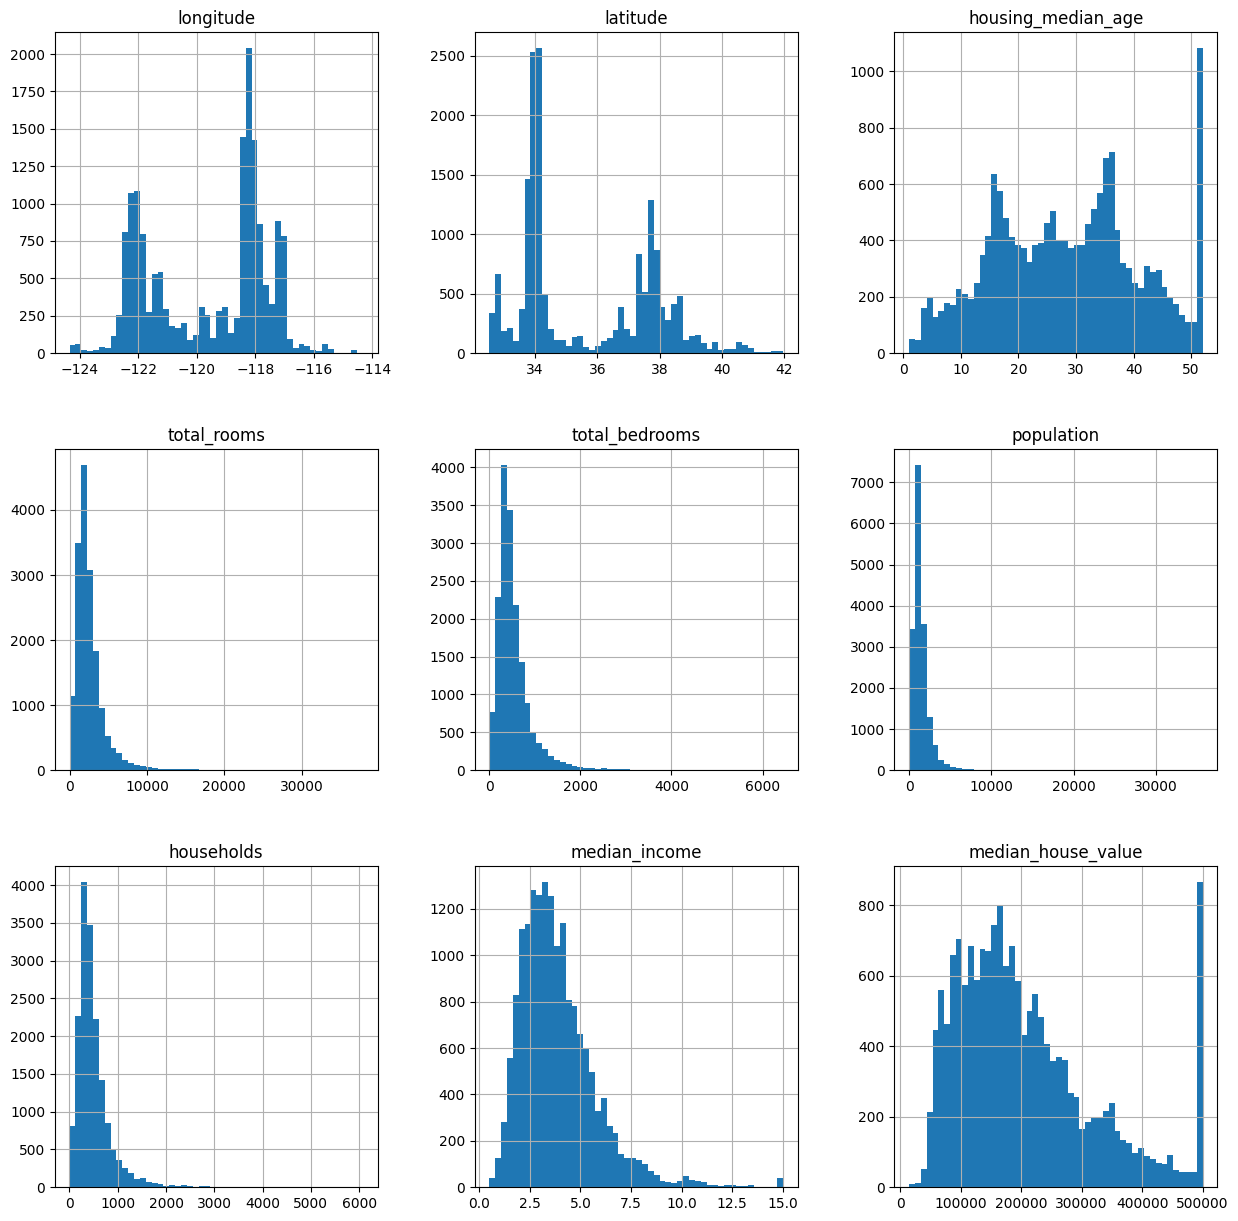

In [44]:
import matplotlib.pyplot as plt

housing_train_df.hist(bins=50, figsize=(15,15))
print("could you make a comment to all the historgrams?")
plt.show()

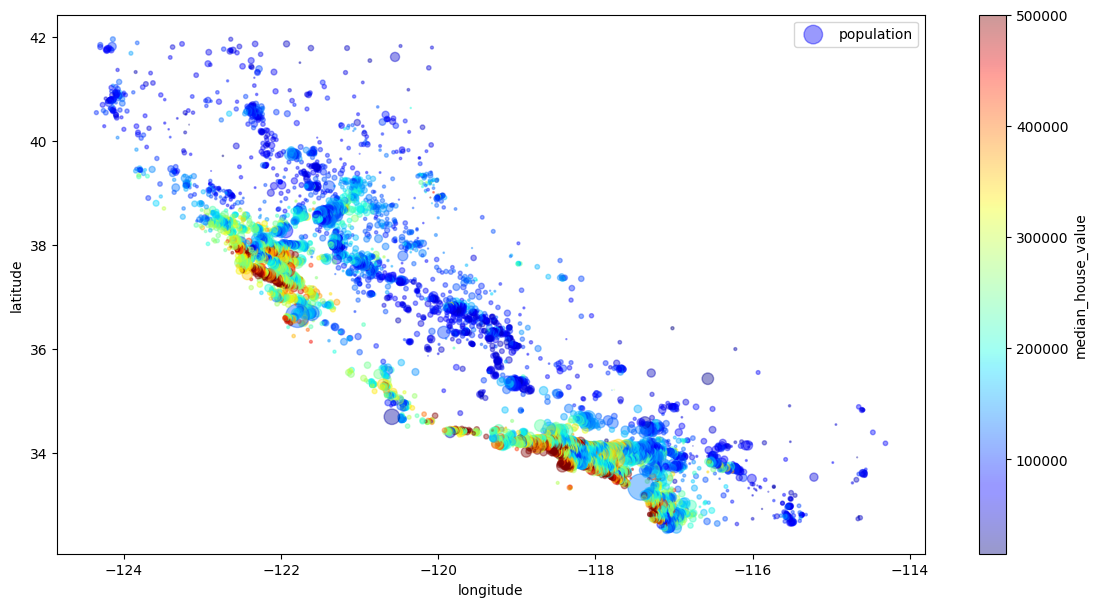

In [46]:
# https://pandas.pydata.org/pandas-docs/version/1.2.0/user_guide/visualization.html

# s = size; c = color
housing_train_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                      s=housing_train_df["population"]/100, label="population",
                      c="median_house_value", cmap=plt.get_cmap("jet"),
                      colorbar=True, figsize=(14,7))
plt.legend()

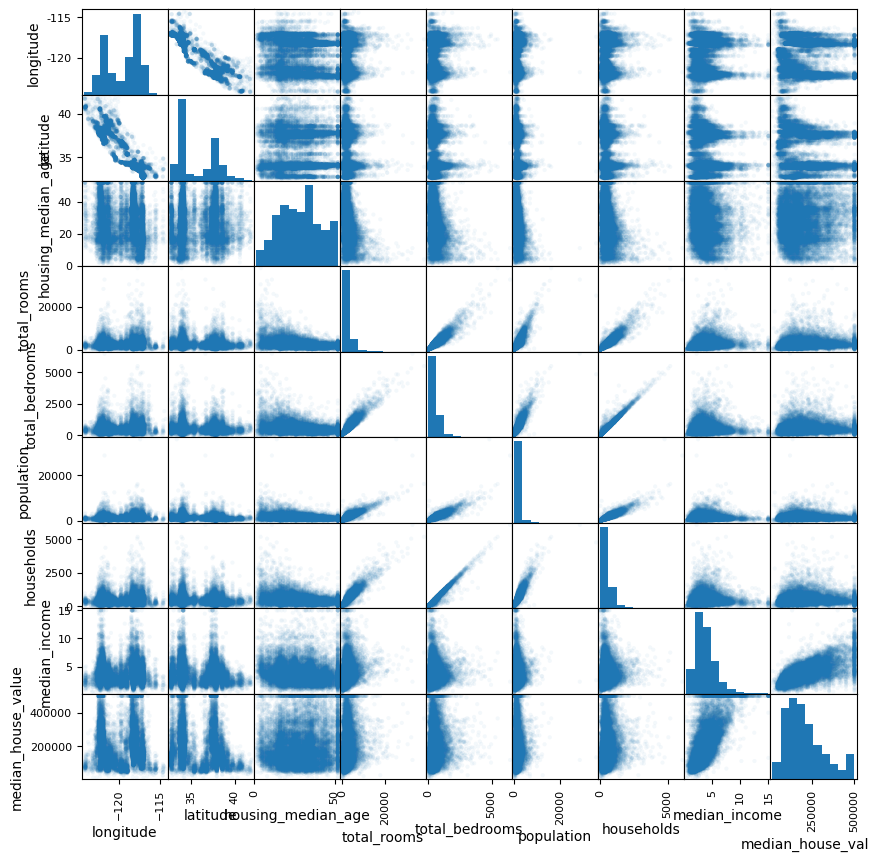

In [47]:
# The scatterplot matrix is a grid of plots of
# multiple variables against each other.
# It shows the relationship of each variable to the others.
# The ones on the diagonal don't fit this pattern.

attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(housing_train_df,
                           alpha=0.05, figsize=(10,10), diagonal='hist')
plt.show()

median_income looks promising


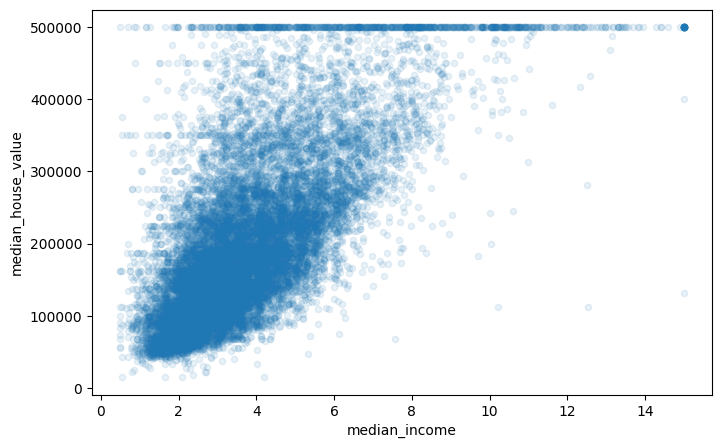

In [48]:
housing_train_df.plot(kind='scatter', x='median_income', y='median_house_value',
                      alpha=0.1, figsize=(8,5))
print("median_income looks promising")

In [49]:
corr_matrix = housing_train_df.corr()
corr_matrix.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [50]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691871
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64

### Linear Regression using sklearn

In [ ]:
# Again, see the first figure. We need prepare four data blocks
# for learning the model parameters.

# Ususlly, we do not implelemt algorithms on our own.
# There exists well-implemented libraries.
# However, again, you should read API documents before using them.

In [51]:
X_train = housing_train_df.drop(['median_house_value'], axis=1)
y_train = housing_train_df['median_house_value']

X_test = housing_test_df.drop(['median_house_value'], axis=1)
y_test = housing_test_df['median_house_value']

In [52]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

#initantiate the linear regression
model = LinearRegression()

#fit the model to the training data (learn the coefficients)
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# print the intercept and coefficients
print("Intercept is ", model.intercept_)
print("coefficients  is ", model.coef_)


# print with feature name
print()
print("median_house_value = ")
for c,f in zip(model.coef_, X_train.columns):
  print(' {0:+} * {1}'.format(c, f))
print("", model.intercept_)

Intercept is  -3620600.8929739078
coefficients  is  [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04]

median_house_value = 
 -43139.63725758569 * longitude
 -42925.67308831368 * latitude
 +1150.6949324745615 * housing_median_age
 -8.378251213198382 * total_rooms
 +117.64854284209014 * total_bedrooms
 -38.48877209597413 * population
 +45.43600255225738 * households
 +40507.06835939748 * median_income
 -3620600.8929739078


* Is it reasonable that the above formula makes sense?

* Why do we believe the real-world data is related
and can be modeled?

* Do you believe this world is linear?

In [54]:
# using the coefficients find by the training data
# to predict the target values of the testing data
y_pred = model.predict(X_test)

In [58]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_squared_error(y_train,model.predict(X_train)))

4867205486.928806
4824523173.926901


In [60]:
# RMSE.
RMSE = pow(np.power(y_test - y_pred, 2).sum()/len(y_test), 0.5)
print(RMSE)

69765.36022216761


### A trick of Graient Decent -- Normalization

* Min-Max Scaling: $X_{norm} = \frac{X-X_{min}}{X_{max}-X_{min}}$

* Z-score Normalization: $z = \frac{x-\mu}{\sigma}$
  * $\mu$ is the mean of original data points; $\sigma$ is the std.
  * z: Mapping data points to a distribution whose mean is 1 and std is 0.

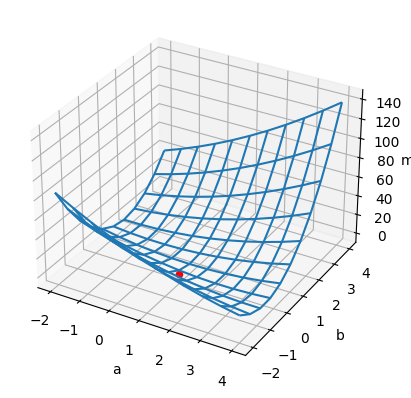

In [61]:
fig_3d

To find the optimized z*, the SGD works as follows.

MSE = $\frac{1}{n}\sum_{i=1}^{n}{(y_i - (\theta_0 + \theta_1 x_i))^{2}}$

$\theta_{i}^{(t+1)} = \theta_{i}^{(t)} - \gamma \frac{\partial \text{MSE}(\theta)}{\partial \theta_i}$

Look! For each step ($t$), the calculated value of partial differential (i.e., $\frac{\partial \text{MSE}(\theta)}{\partial \theta_i}$) on each axis are different, i.e., the length of stride on each axis is different.

In this case, the "speed" of finding the minimum point in each dimension is different. In order to make the MSE convex function to be more like "a bowl" in evvery dimension, we apply Min-Max Scaling or Z-score Normalization to each dimension.

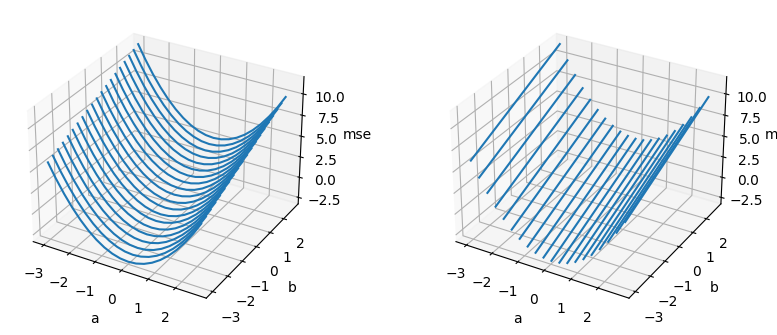

In [63]:
def fun(x, y):
    return x**2 + y

x = y = np.arange(-3.0, 3.0, 0.3)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

fig_3d_a = plt.figure(figsize=(10,4))
ax_l = fig_3d_a.add_subplot(121, projection='3d')
ax_r = fig_3d_a.add_subplot(122, projection='3d')

ax_l.plot_wireframe(X, Y, Z, rstride=1, cstride=0)
ax_r.plot_wireframe(X, Y, Z, rstride=0, cstride=1)

ax_l.set_xlabel('a')
ax_l.set_ylabel('b')
ax_l.set_zlabel('mse')

ax_r.set_xlabel('a')
ax_r.set_ylabel('b')
ax_r.set_zlabel('mse')

plt.show()


https://www.sciencemag.org/news/2018/05/ai-researchers-allege-machine-learning-alchemy

Gradient descent relies on trial and error to optimize an algorithm, aiming for minima in a 3D landscape.

ALEXANDER AMINI, DANIELA RUS. MASSACHUSETTS INSTITUTE OF TECHNOLOGY, ADAPTED BY M. ATAROD/SCIENCE

![Gradient descent relies on trial and error to optimize an algorithm, aiming for minima in a 3D landscape.](https://www.science.org/do/10.1126/science.aau0577/full/ma_0504_NID_alchemy_WEB.jpg)